# Muhammad Faraz Nadeem Khan

In [2]:
# Importing Libraries
import numpy as np
import pandas as pd
import missingno as mano
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
# Reading Data 
df = pd.read_csv('nyc-rolling-sales-dirty.csv')

In [1980]:
df.shape

(84548, 22)

In [1981]:
pd.set_option('display.max_columns', None) #This commands increases the limit for pandas to display data

In [1982]:
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392.0,No Number,NaN,65000,NaN,NaN,10009.0,5,0,5,1633,6440,1900,2,C2,6625000,why
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399.0,26,,C7,NaN,,NaN,28,3,31,4616,18690,1900,2,C7,-,12/14/2016 0:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,NaN,399.0,39,,C7,NaN,,NaN,16,1,17,2212,7803,1900,2,C7,-,12/09/2016 0:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,NaN,402.0,21,,C4,NaN,,NaN,10,0,10,2272,6794,1913,2,C4,3936272,9/23/2016 0:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,NaN,404.0,55,,C2,NaN,,NaN,6,0,6,2369,4615,1900,2,C2,8000000,11/17/2016 0:00


# Removing Unnecessary coloumns

In [1983]:
df.drop(["EASE-MENT"], axis=1, inplace=True)         #Cause the entire coloumn is blank & 
                                                     #and no description available in the Finance department file
df.drop(["Unnamed: 0"], axis=1, inplace=True)        #Cause it has no unique values
df.drop(["APARTMENT NUMBER"], axis=1, inplace=True)  #Coloumn is black and no description available in the
                                                     #Finance department file

# Making a coloumn for unique value in the data frame

In [1984]:
df['SALE_ID'] = df.index

# Creating a function for information of each coloumn

In [1985]:
def infocol(df,col):
    a=df[col].isnull().sum()
    b=len(df[col].unique())
    c=df[col].is_unique
    d=df[col].dtypes  
    return print(col, "\nNull Values:", a,"\nNo. of uniques:",b,"\nUnique key:",c,"\nType:",d)

In [1986]:
def ranges(df,col):
    e=df[col].min()
    f=df[col].max()
    g=df[col].mean()
    h=df[col].median()
    i=df[col].mode()
    return print(col,"\nMin: ",e,"\nMax: ", f,"\nMean: ",g,"\nMedian: ",h,"\nMode: ",i) 

In [1987]:
df.isnull().sum()

BOROUGH                            0
NEIGHBORHOOD                      30
BUILDING CLASS CATEGORY           51
TAX CLASS AT PRESENT               7
BLOCK                             16
LOT                                0
BUILDING CLASS AT PRESENT          0
ADDRESS                           45
ZIP CODE                          36
RESIDENTIAL UNITS                  0
COMMERCIAL UNITS                   0
TOTAL UNITS                        0
LAND SQUARE FEET                   0
GROSS SQUARE FEET                  0
YEAR BUILT                         0
TAX CLASS AT TIME OF SALE          0
BUILDING CLASS AT TIME OF SALE     0
SALE PRICE                         0
SALE DATE                          0
SALE_ID                            0
dtype: int64

# 1.1 BOROUGH  (Dealing with data entry errors)

In [1988]:
infocol(df,"BOROUGH")

BOROUGH 
Null Values: 0 
No. of uniques: 5 
Unique key: False 
Type: int64


In [1989]:
df['BOROUGH'].replace(1,"Manhattan" , inplace=True) 

In [1990]:
df['BOROUGH'].replace(2,"Bronx" , inplace=True) 

In [1991]:
df['BOROUGH'].replace(3,"Brooklyn" , inplace=True) 

In [1992]:
df['BOROUGH'].replace(4,"Queens" , inplace=True) 

In [1993]:
df['BOROUGH'].replace(5,"Staten Island " , inplace=True) 

In [1994]:
df['BOROUGH'].value_counts()

Queens            26736
Brooklyn          24047
Manhattan         18306
Staten Island      8410
Bronx              7049
Name: BOROUGH, dtype: int64

<AxesSubplot:>

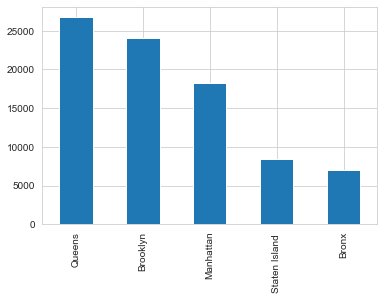

In [1995]:
df['BOROUGH'].value_counts().plot(kind='bar')
#This shows that no. of building sold is maximum in Queens and minimum in Bronx

# 2.1 NEIGHBORHOOD (Dealing with data entry errors)

In [1996]:
infocol(df,"NEIGHBORHOOD")

NEIGHBORHOOD 
Null Values: 30 
No. of uniques: 255 
Unique key: False 
Type: object


In [1997]:
df['NEIGHBORHOOD'].replace(' ', pd.NaT, inplace=True)

In [1998]:
infocol(df,"NEIGHBORHOOD")

NEIGHBORHOOD 
Null Values: 30 
No. of uniques: 255 
Unique key: False 
Type: object


#### NEIGHBORHOOD coloumn doesnot contain any data entry errors

# 3.1 BUILDING CLASS CATEGORY (Dealing with data entry errors)

In [1999]:
df['BUILDING CLASS CATEGORY'].isnull().sum()

51

In [2000]:
df['BUILDING CLASS CATEGORY'].value_counts().head() #The numbers at the start of
                                                    #each values dont make any sense, we must get rid of them

01 ONE FAMILY DWELLINGS                        18235
02 TWO FAMILY DWELLINGS                        15828
13 CONDOS - ELEVATOR APARTMENTS                12989
10 COOPS - ELEVATOR APARTMENTS                 12902
03 THREE FAMILY DWELLINGS                       4348
Name: BUILDING CLASS CATEGORY, dtype: int64

In [2001]:
df['BUILDING CLASS CATEGORY'] = df['BUILDING CLASS CATEGORY'].str.replace('\d+', '') #Getting rid of unnecessary numbers

In [2002]:
df['BUILDING CLASS CATEGORY'].value_counts().head()

 ONE FAMILY DWELLINGS                        18235
 TWO FAMILY DWELLINGS                        15828
 CONDOS - ELEVATOR APARTMENTS                12989
 COOPS - ELEVATOR APARTMENTS                 12902
 THREE FAMILY DWELLINGS                       4348
Name: BUILDING CLASS CATEGORY, dtype: int64

<AxesSubplot:>

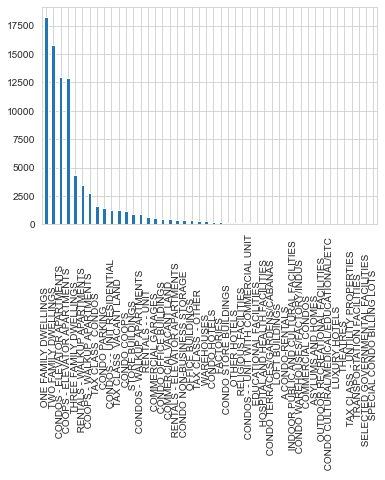

In [2003]:
df['BUILDING CLASS CATEGORY'].value_counts().plot(kind='bar')
#Which shows one family homes are the most bought category of property

# 4.1 TAX CLASS AT PRESENT (Dealing with data entry errors)

In [2004]:
df['TAX CLASS AT PRESENT'].value_counts()

1     38633
2     30915
4      6140
2A     2520
2C     1915
1A     1444
1B     1234
2B      812
        738
1C      186
3         4
Name: TAX CLASS AT PRESENT, dtype: int64

In [2005]:
df.loc[df['TAX CLASS AT PRESENT'] == '1A' , 'TAX CLASS AT PRESENT'] = "1"
df.loc[df['TAX CLASS AT PRESENT'] == '1B' , 'TAX CLASS AT PRESENT'] = "1"
df.loc[df['TAX CLASS AT PRESENT'] == '1C' , 'TAX CLASS AT PRESENT'] = "1"
df.loc[df['TAX CLASS AT PRESENT'] == '2A' , 'TAX CLASS AT PRESENT'] = "2"
df.loc[df['TAX CLASS AT PRESENT'] == '2B' , 'TAX CLASS AT PRESENT'] = "2"
df.loc[df['TAX CLASS AT PRESENT'] == '2C' , 'TAX CLASS AT PRESENT'] = "2"

In [2006]:
df['TAX CLASS AT PRESENT'].isnull().sum()

7

In [2007]:
df['TAX CLASS AT PRESENT'].replace(' ', np.nan, inplace=True) #CHecking if there are any blank values

In [2008]:
df['TAX CLASS AT PRESENT'].isnull().sum() #damn!!! 745!!!!!

745

In [2009]:
df['TAX CLASS AT PRESENT'].value_counts()

1    41497
2    36162
4     6140
3        4
Name: TAX CLASS AT PRESENT, dtype: int64

<AxesSubplot:>

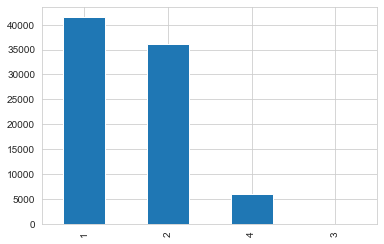

In [2010]:
df['TAX CLASS AT PRESENT'].value_counts().plot(kind='bar')
#Which shows that most buildings are chrged with class 1 tax class

# 5.1 BLOCK (Dealing with data entry errors)

In [2011]:
infocol(df,"BLOCK")

BLOCK 
Null Values: 16 
No. of uniques: 11567 
Unique key: False 
Type: float64


In [2012]:
df["BLOCK"].value_counts()

5066.0     404
16.0       255
2135.0     211
4978.0     187
1171.0     181
          ... 
16194.0      1
10386.0      1
1898.0       1
14027.0      1
11994.0      1
Name: BLOCK, Length: 11566, dtype: int64

In [2013]:
df['BLOCK'].replace(' ', np.nan, inplace=True) #CHecking if there are any blank values

In [2014]:
df['BLOCK'].isnull().sum()

16

In [2015]:
df['BLOCK'] =pd.to_numeric(df['BLOCK'], errors='coerce')

In [2016]:
df['BLOCK'].isnull().sum()

16

It was cleaned originally

# 6.1 LOT (Dealing with data entry errors)

In [2017]:
df['LOT'].isnull().sum() #Chechking the number of nulls at initial level

0

In [2018]:
df['LOT'].replace(' ', pd.NaT, inplace=True) #Converting any blank spaces with null values
df['LOT'].isnull().sum() #Checking if the above statement add any null values in the coloumn

0

In [2019]:
df['LOT'] =pd.to_numeric(df['LOT'], errors='coerce')
#Those values which cannot be converted into numeric are replaced with nulls
df['LOT'].isnull().sum()

10

# 7.1 BUILDING CLASS AT PRESENT (Dealing with data entry errors)

In [2020]:
df['BUILDING CLASS AT PRESENT'].isnull().sum() #Chechking the number of nulls at initial level

0

There is one numeric value of 65000 in this coloumn, we can easily replace it, but dont know if there are more 
numeric values down the coloumn

In [2021]:
a=pd.to_numeric(df['BUILDING CLASS AT PRESENT'], errors='coerce')
a.value_counts() #65000 is the only one

65000.0    1
Name: BUILDING CLASS AT PRESENT, dtype: int64

In [2022]:
df['BUILDING CLASS AT PRESENT'].replace('65000', pd.NaT, inplace=True)
df['BUILDING CLASS AT PRESENT'].isnull().sum()

1

# 8.1 ADDRESS (Dealing with data entry errors)

In [2023]:
df['ADDRESS'].isnull().sum()

45

In [2024]:
df['ADDRESS'].replace(' ', pd.NaT, inplace=True) #Converting any blank spaces with null values
df['ADDRESS'].isnull().sum() #Checking if the above statement add any null values in the coloumn

45

There were no data entry errors

# 9.1 ZIP CODE (Dealing with data entry errors)

In [2025]:
df['ZIP CODE'].isnull().sum()

36

In [2026]:
df['ZIP CODE'] =pd.to_numeric(df['ZIP CODE'], errors='coerce')
df['ZIP CODE'].isnull().sum()

36

In [2027]:
df['ZIP CODE'].replace(' ', pd.NaT, inplace=True) #Converting any blank spaces with null values
df['ZIP CODE'].isnull().sum() #Checking if the above statement add any null values in the coloumn

36

In [2028]:
df['ZIP CODE'].replace(0, pd.NaT, inplace=True) #Converting zeros with null values
df['ZIP CODE'].isnull().sum() #Checking if the above statement add any null values in the coloumn

1018

# 10.1  RESIDENTIAL UNITS (Dealing with data entry errors)

In [2029]:
df['RESIDENTIAL UNITS'].isnull().sum()

0

In [2030]:
df['RESIDENTIAL UNITS'] =pd.to_numeric(df['RESIDENTIAL UNITS'], errors='coerce')
df['RESIDENTIAL UNITS'].isnull().sum()

0

In [2031]:
df['RESIDENTIAL UNITS'].replace(' ', pd.NaT, inplace=True) #Converting any blank spaces with null values
df['RESIDENTIAL UNITS'].isnull().sum() #Checking if the above statement add any null values in the coloumn

0

There are no data entry errors

# 11.1  COMMERCIAL UNITS (Dealing with data entry errors)

In [2032]:
df['COMMERCIAL UNITS'].isnull().sum()

0

In [2033]:
df['COMMERCIAL UNITS'] =pd.to_numeric(df['COMMERCIAL UNITS'], errors='coerce')
df['COMMERCIAL UNITS'].isnull().sum()

0

In [2034]:
df['RESIDENTIAL UNITS'].replace(' ', pd.NaT, inplace=True) #Converting any blank spaces with null values
df['RESIDENTIAL UNITS'].isnull().sum() #Checking if the above statement add any null values in the coloumn

0

There are no data entry errors

# 12.1  TOTAL UNITS (Dealing with data entry errors)

In [2035]:
df['TOTAL UNITS'].isnull().sum()

0

In [2036]:
df['TOTAL UNITS'] =pd.to_numeric(df['TOTAL UNITS'], errors='coerce')
df['TOTAL UNITS'].isnull().sum()

0

In [2037]:
df['TOTAL UNITS'].replace(' ', pd.NaT, inplace=True) #Converting any blank spaces with null values
df['TOTAL UNITS'].isnull().sum() #Checking if the above statement add any null values in the coloumn

0

There are no data entry errors

# 13.1 LAND SQUARE FEET (Dealing with data entry errors)

In [2038]:
df['LAND SQUARE FEET'].isnull().sum() #Chechking the number of nulls at initial level

0

In [2039]:
df['LAND SQUARE FEET'] =pd.to_numeric(df['LAND SQUARE FEET'], errors='coerce')
#Those values which cannot be converted into numeric are replaced with nulls
df['LAND SQUARE FEET'].isnull().sum()

26252

In [2040]:
df['LAND SQUARE FEET'].replace(' ', pd.NaT, inplace=True) #Converting any blank spaces with null values
df['LAND SQUARE FEET'].isnull().sum() #Checking if the above statement add any null values in the coloumn

26252

In [2041]:
df['LAND SQUARE FEET'].replace(0, pd.NaT, inplace=True) #Converting zeros with null values
df['LAND SQUARE FEET'].isnull().sum() #Checking if the above statement add any null values in the coloumn

36578

# 14.1 GROSS SQUARE FEET (Dealing with data entry errors)

In [2042]:
df['GROSS SQUARE FEET'].isnull().sum() #Chechking the number of nulls at initial level

0

In [2043]:
df['GROSS SQUARE FEET'] =pd.to_numeric(df['GROSS SQUARE FEET'], errors='coerce')
#Those values which cannot be converted into numeric are replaced with nulls
df['GROSS SQUARE FEET'].isnull().sum()

27612

In [2044]:
df['GROSS SQUARE FEET'].replace(' ', pd.NaT, inplace=True) #Converting any blank spaces with null values
df['GROSS SQUARE FEET'].isnull().sum() #Checking if the above statement add any null values in the coloumn

27612

In [2045]:
df['GROSS SQUARE FEET'].replace(0, pd.NaT, inplace=True) #Converting zeros with null values
df['GROSS SQUARE FEET'].isnull().sum() #Checking if the above statement add any null values in the coloumn

39029

# 15.1 YEAR BUILT (Dealing with data entry errors)

In [2046]:
df['YEAR BUILT'].isnull().sum() #Chechking the number of nulls at initial level

0

In [2047]:
df['YEAR BUILT'] =pd.to_numeric(df['YEAR BUILT'], errors='coerce')
#Those values which cannot be converted into numeric are replaced with nulls
df['YEAR BUILT'].isnull().sum()

0

In [2048]:
df['YEAR BUILT'].replace(' ', pd.NaT, inplace=True) #Converting any blank spaces with null values
df['YEAR BUILT'].isnull().sum() #Checking if the above statement add any null values in the coloumn

0

In [2049]:
df['YEAR BUILT'].replace(0, pd.NaT, inplace=True) #Converting any zeros with null values
df['YEAR BUILT'].isnull().sum() #Checking if the above statement add any null values in the coloumn

6970

## Data type change

In [2050]:
df['YEAR BUILT'] =pd.to_datetime(df['YEAR BUILT'], errors='coerce')
#Those values which cannot be converted into numeric are replaced with nulls
df['YEAR BUILT'].isnull().sum()

6970

# 16.1 TAX CLASS AT TIME OF SALE (Dealing with data entry errors)

In [2051]:
df['TAX CLASS AT TIME OF SALE'].value_counts()

1    41533
2    36726
4     6285
3        4
Name: TAX CLASS AT TIME OF SALE, dtype: int64

In [2052]:
df['TAX CLASS AT TIME OF SALE'].replace(' ', pd.NaT, inplace=True) #Converting any blank spaces with null values
df['TAX CLASS AT TIME OF SALE'].isnull().sum() #means there were no blank spaces too

0

In [2053]:
df['TAX CLASS AT TIME OF SALE'].replace(0, pd.NaT, inplace=True) #Converting any zeros with null values
df['TAX CLASS AT TIME OF SALE'].isnull().sum() #Means there were no zero too

0

<AxesSubplot:>

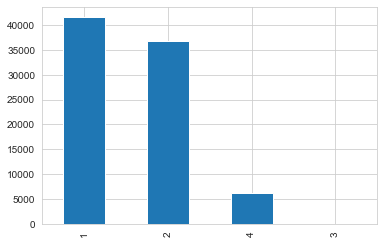

In [2054]:
df['TAX CLASS AT TIME OF SALE'].value_counts().plot(kind='bar') #Quite similar distribution of values as in 
                                                                #TAX CLASS AT PRESENT

There are no data entry errors

# 17.1 BUILDING CLASS AT TIME OF SALE (Dealing with data entry errors)

In [2055]:
df['BUILDING CLASS AT TIME OF SALE'].value_counts()

R4    12989
D4    12666
A1     6751
A5     5671
B2     4918
      ...  
M2        1
HS        1
I3        1
CM        1
P7        1
Name: BUILDING CLASS AT TIME OF SALE, Length: 166, dtype: int64

In [2056]:
infocol(df,"BUILDING CLASS AT TIME OF SALE")

BUILDING CLASS AT TIME OF SALE 
Null Values: 0 
No. of uniques: 166 
Unique key: False 
Type: object


There are no data entry errors

# 18.1 SALE PRICE (DEALING WITH DATA ENTRY ERROR)

In [2057]:
df['SALE PRICE'].isnull().sum() #Chechking the number of nulls at initial level

0

In [2058]:
df['SALE PRICE'] =pd.to_numeric(df['SALE PRICE'], errors='coerce')
#Those values which cannot be converted into numeric are replaced with nulls
df['SALE PRICE'].isnull().sum()

14561

In [2059]:
df['SALE PRICE'].value_counts()

0.0          10228
10.0           766
450000.0       427
550000.0       416
650000.0       414
             ...  
5260000.0        1
1448094.0        1
2127500.0        1
734750.0         1
1038348.0        1
Name: SALE PRICE, Length: 10007, dtype: int64

# 19.1 SALE DATE (Dealing with data entry errors)

In [2060]:
infocol(df,"SALE DATE")

SALE DATE 
Null Values: 0 
No. of uniques: 367 
Unique key: False 
Type: object


In [2061]:
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'], errors='coerce')
df['SALE DATE'].isnull().sum()

3

# Checking null values in all the coloumns

In [2062]:
df.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                         30
BUILDING CLASS CATEGORY              51
TAX CLASS AT PRESENT                745
BLOCK                                16
LOT                                  10
BUILDING CLASS AT PRESENT             1
ADDRESS                              45
ZIP CODE                           1018
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  36578
GROSS SQUARE FEET                 39029
YEAR BUILT                         6970
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             3
SALE_ID                               0
dtype: int64

<AxesSubplot:>

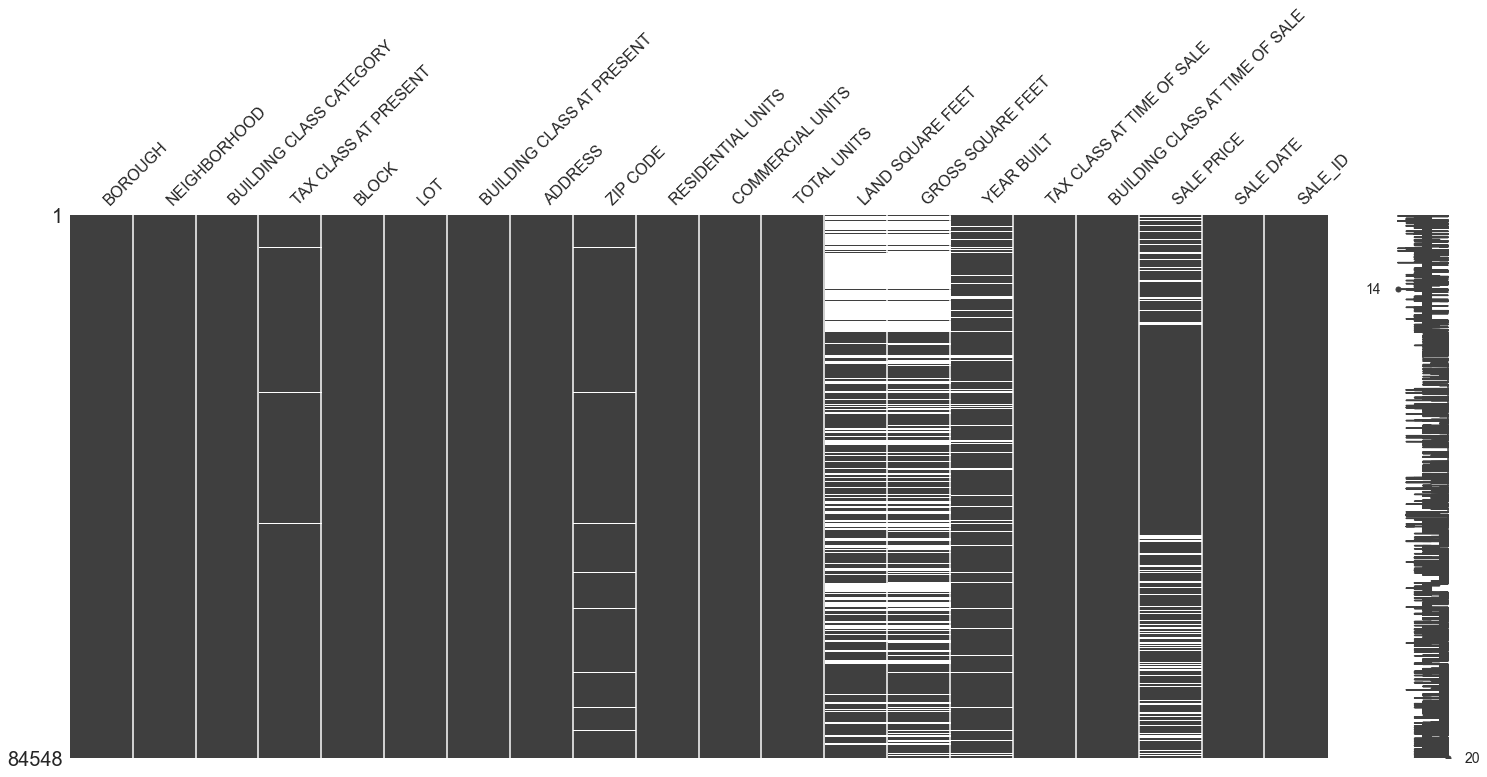

In [2063]:
# visualize the location of the missingness of data using mano.matrix
mano.matrix(df)

We can see above that four of the columns have similar missing value patterns to some extent. So, it is an example of MNAR.
Those coloumns are:

1.LAND SQUARE FEET

2.GROSS SQUARE FEET 

3.YEAR BUILT

4.SALE PRICE

In [2064]:
a=df["LAND SQUARE FEET"].isnull().sum()
b=df["GROSS SQUARE FEET"].isnull().sum()
c=df["YEAR BUILT"].isnull().sum()
d=df["SALE PRICE"].isnull().sum()
print("Null Values")
print("LAND SQUARE FEET:",a)
print("GROSS SQUARE FEET:",b)
print("YEAR BUILT:",c)
print("SALE PRICE:",d)

Null Values
LAND SQUARE FEET: 36578
GROSS SQUARE FEET: 39029
YEAR BUILT: 6970
SALE PRICE: 14561


# Percentage of rows which have null values in the above mentioned coloumns 

In [2065]:
l=len(df)  #LENGHT OF ORIGINAL DATA FRAME IS 84548
l 

84548

In [2066]:
p=df.loc[df["LAND SQUARE FEET"].isnull() & df["GROSS SQUARE FEET"].isnull() & df["YEAR BUILT"].isnull() & df["SALE PRICE"].isnull(), ["SALE_ID"]]
a=len(p)
b=(a/84548) *100
print("Total no. of rows:", 84548)
print("Total no of rows having null values in above mentioned coloumns:", a)
print("Percentage of null values in the above mentioned coloumns is:" , b, "%")

Total no. of rows: 84548
Total no of rows having null values in above mentioned coloumns: 915
Percentage of null values in the above mentioned coloumns is: 1.082225481383356 %


#### 1.08% is a very low value, and deleting them altogether would not be a bad idea.

In [2067]:
for x in p['SALE_ID']:
    df = df[df.SALE_ID != x]

#  Percentage of rows which have null values in LAND SQUARE FEET, GROSS SQUARE FEET and SALE PRICE coloumns

In [2068]:
p=df.loc[df["LAND SQUARE FEET"].isnull() & df["GROSS SQUARE FEET"].isnull() & df["SALE PRICE"].isnull(), ["SALE_ID"]]
a=len(p)
b=(a/84548) *100
print("Total no. of rows:", 84548)
print("Total no of rows having null values in above mentioned coloumns:", a)
print("Percentage of null values in the above mentioned coloumns is:" , b, "%")

Total no. of rows: 84548
Total no of rows having null values in above mentioned coloumns: 4147
Percentage of null values in the above mentioned coloumns is: 4.9049060888489375 %


### 4.9% is again less than our max limit of deleting data which is 5% of the original data  

In [2069]:
for x in p['SALE_ID']:
    df = df[df.SALE_ID != x]

In [2071]:
df.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                         30
BUILDING CLASS CATEGORY              38
TAX CLASS AT PRESENT                680
BLOCK                                12
LOT                                   9
BUILDING CLASS AT PRESENT             1
ADDRESS                              45
ZIP CODE                            979
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  31516
GROSS SQUARE FEET                 33967
YEAR BUILT                         6055
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                         9499
SALE DATE                             2
SALE_ID                               0
dtype: int64

# 1.2 BOROUGH (Filling nulls with values)

This coloumn doesnt have null values

# 2.2 NEIGHBORHOOD (Filling nulls with values)

In [2072]:
infocol(df,"NEIGHBORHOOD") #Checking our coloumn

NEIGHBORHOOD 
Null Values: 30 
No. of uniques: 255 
Unique key: False 
Type: object


Although it is not mentioned, but we are assuming that block is the subcategory of neighborhood coloumn

In [2073]:
a=df.loc[df["NEIGHBORHOOD"].isnull() , ["NEIGHBORHOOD","BLOCK"]]
for x in a['BLOCK']:                                                          #for each value of BLOCK in 'a' the 
                                                                              #loop will run
    b=df.loc[df["BLOCK"]==x , ["NEIGHBORHOOD","BLOCK"]]                       # step 2. now for each value of BLOCK 
                                                                              # we must now find the most repeating 
                                                                              # value of neighborhood in the original data frame
    c=b.mode()['NEIGHBORHOOD'][0]                                             
                                     
                                                                              # here we could have taken the first but taking
                                                                              # mode here nullifies the possibility that the 
                                                                              # we mistakenly pick Nan if that is 
                                                                              # coincidently the first value
    cond = (df['BLOCK'] == x) & (df['NEIGHBORHOOD'].isnull())                 # step 3. replacing null values with appropriate values
    df.loc[cond, 'NEIGHBORHOOD'] = c

In [2074]:
df["NEIGHBORHOOD"].isnull().sum() 

0

# 3.2 BUILDING CLASS CATEGORY (Filling nulls with values)

### BUILDING CLASS CATEGORY is a sub-category of TAX CLASS AT PRESENT 

In [2075]:
# Distribution of BUILDING CLASS CATEGORY in TAX CLASS AT PRESENT
df.groupby(['TAX CLASS AT PRESENT', 'BUILDING CLASS CATEGORY']).size().head(60)

TAX CLASS AT PRESENT  BUILDING CLASS CATEGORY                   
1                      COMMERCIAL VACANT LAND                           1
                       OFFICE BUILDINGS                                 1
                       ONE FAMILY DWELLINGS                         18233
                       RELIGIOUS FACILITIES                             1
                       RENTALS - WALKUP APARTMENTS                      5
                       STORE BUILDINGS                                  1
                       TAX CLASS  - OTHER                             183
                       TAX CLASS  CONDOS                             1430
                       TAX CLASS  VACANT LAND                        1237
                       THREE FAMILY DWELLINGS                        4344
                       TWO FAMILY DWELLINGS                         15825
2                      COMMERCIAL CONDOS                                1
                       COMMERCIAL GARAGES      

In [2076]:
# Where TAX CLASS AT PRESENT is 1 - ONE FAMILY DWELLINGS
c1 = (df['TAX CLASS AT PRESENT'] == '1') & (df['BUILDING CLASS CATEGORY'].isnull())
df.loc[c1, 'BUILDING CLASS CATEGORY'] = 'ONE FAMILY HOME'

# Where TAX CLASS AT PRESENT is 2 - CONDOS - ELEVATOR APARTMENTS
c1 = (df['TAX CLASS AT PRESENT'] == '2') & (df['BUILDING CLASS CATEGORY'].isnull())
df.loc[c1, 'BUILDING CLASS CATEGORY'] = 'CONDOS - ELEVATOR APARTMENTS'

# Where TAX CLASS AT PRESENT is 3 - TAX CLASS  - UNTILITY PROPERTIES
c1 = (df['TAX CLASS AT PRESENT'] == '3') & (df['BUILDING CLASS CATEGORY'].isnull())
df.loc[c1, 'BUILDING CLASS CATEGORY'] = 'TAX CLASS  - UNTILITY PROPERTIES'

# Where TAX CLASS AT PRESENT is 4 - TAX CLASS  - CONDO PARKING
c1 = (df['TAX CLASS AT PRESENT'] == '4') & (df['BUILDING CLASS CATEGORY'].isnull())
df.loc[c1, 'BUILDING CLASS CATEGORY'] = 'TAX CLASS  - CONDO PARKING'

In [2077]:
df['BUILDING CLASS CATEGORY'].isnull().sum()

0

# 4.2 TAX CLASS AT PRESENT (Filling nulls with values)

### BUILDING CLASS CATEGORY is a sub-category of TAX CLASS AT PRESENT 

In [2078]:
# rows where TAX CLASS AT PRESENT has nulls are filtered with their corresponding BUILDING CLASS CATEGORY 
a=df.loc[df["TAX CLASS AT PRESENT"].isnull() , ["TAX CLASS AT PRESENT","BUILDING CLASS CATEGORY"]]                                                                                                    
for x in a['BUILDING CLASS CATEGORY']:                                          #for each value of BUILDING CLASS CATEGORY  
                                                                                #loop will run
    b=df.loc[df["BUILDING CLASS CATEGORY"]==x , ["TAX CLASS AT PRESENT","BUILDING CLASS CATEGORY"]]  # step 2. now for each value of BUILDING CLASS CATEGORY 
                                                                                # we must now find the most repeated 
                                                                                # TAX CLASS PRESENT value in the original data frame
    c=b.mode()['TAX CLASS AT PRESENT'][0]                                       
                                     
                                                                                # here we could have taken the first value but taking
                                                                                # mode here nullifies the possibility that the 
                                                                                # we mistakenly pick Nan if that is 
                                                                                # coincidently the first value
    cond = (df['BUILDING CLASS CATEGORY'] == x) & (df['TAX CLASS AT PRESENT'].isnull())    # step 3. replacing null values with appropriate values
    df.loc[cond, 'TAX CLASS AT PRESENT'] = c

In [2079]:
df["TAX CLASS AT PRESENT"].isnull().sum()

0

# 5.2 BLOCK (Filling nulls with values)

As mentioned in the glossary, The Department of Finance uses a Borough-Block-Lot classification, which means block is a subcategory of Borough

In [2080]:
infocol(df,"BLOCK")

BLOCK 
Null Values: 12 
No. of uniques: 11559 
Unique key: False 
Type: float64


In [2081]:
# rows where BLOCK has nulls are filtered with their corresponding BOROUGH 
a=df.loc[df["BLOCK"].isnull() , ["BLOCK","BOROUGH"]]
for x in a['BOROUGH']:                                          #for each value of BOROUGH  
                                                                                #loop will run
    b=df.loc[df["BOROUGH"]==x , ["BLOCK","BOROUGH"]]  # step 2. now for each value of BOROUGH 
                                                                                # we must now find the most repeated 
                                                                                # TAX CLASS PRESENT value in the original data frame
    c=b.mode()['BLOCK'][0]                                       
                                     
                                                                                # here we could have taken the first value but taking
                                                                                # mode here nullifies the possibility that the 
                                                                                # we mistakenly pick Nan if that is 
                                                                                # coincidently the first value
    cond = (df['BOROUGH'] == x) & (df['BLOCK'].isnull())    # step 3. replacing null values with appropriate values
    df.loc[cond, 'BLOCK'] = c

In [2082]:
df["BLOCK"].isnull().sum()

0

# 6.2 LOT (Filling nulls with values)

In [2083]:
df['LOT'].mode()

0    1.0
dtype: float64

In [2084]:
df["LOT"].isnull().sum()

9

In [2085]:
df['LOT'].replace(np.nan,1 , inplace=True) #REPLACING WITH NULLS

# 7.2 BUILDING CLASS AT PRESENT (Filling nulls with values)

In [2086]:
df['BUILDING CLASS AT PRESENT'].isnull().sum() #only one missing value, replacing it with mode 

1

In [2087]:
df['BUILDING CLASS AT PRESENT'] =df['BUILDING CLASS AT PRESENT'].fillna(df['BUILDING CLASS AT PRESENT'].mode())
df['BUILDING CLASS AT PRESENT'].isnull().sum()

0

# 8.2 ADDRESS (Filling nulls with values)

Filling null values with BLOCK

In [2088]:
infocol(df,"ADDRESS")

ADDRESS 
Null Values: 45 
No. of uniques: 65699 
Unique key: False 
Type: object


In [2089]:
# rows where ADRESS has nulls are filtered with their corresponding BLOCK 
a=df.loc[df["ADDRESS"].isnull() , ["ADDRESS","BLOCK"]]
for x in a['BLOCK']:                                                            #for each value of BLOCK  
                                                                                #loop will run
    b=df.loc[df["BLOCK"]==x , ["ADDRESS","BLOCK"]]                              # step 2. now for each value of BLOCK 
                                                                                # we must now find the most repeated 
                                                                                # TAX CLASS PRESENT value in the original data frame
    c=b.mode()['ADDRESS'][0]                                       
                                     
                                                                                # here we could have taken the first value but taking
                                                                                # mode here nullifies the possibility that the 
                                                                                # we mistakenly pick Nan if that is 
                                                                                # coincidently the first value
    cond = (df['BLOCK'] == x) & (df['ADDRESS'].isnull())                        # step 3. replacing null values with appropriate values
    df.loc[cond, 'ADDRESS'] = c

In [2090]:
df["ADDRESS"].isnull().sum()

0

# 9.2 ZIP CODE (Filling nulls with values)

### (Replacing null values of ZIP CODE with modes based on ADDRESS)

In [2091]:
infocol(df,"ZIP CODE")

ZIP CODE 
Null Values: 979 
No. of uniques: 186 
Unique key: False 
Type: float64


In [2092]:
# rows where ZIP CODE has nulls are filtered with their corresponding ADDRESS 
a=df.loc[df["ZIP CODE"].isnull() , ["ZIP CODE","ADDRESS"]]
for x in a['ADDRESS']:                                          #for each value of ADDRESS  
                                                                #loop will run
    b=df.loc[df["ADDRESS"]==x , ["ZIP CODE","ADDRESS"]]         # step 2. now for each value of ADDRESS 
                                                                # we must now find the most repeated 
                                                                # ZIP CODE value in the original data frame
    c=b.mode()['ZIP CODE'][0]                                       
                                     
                                                               # here we could have taken the first value but taking
                                                               # mode here nullifies the possibility that the 
                                                               # we mistakenly pick Nan if that is 
                                                               # coincidently the first value
    cond = (df['ADDRESS'] == x) & (df['ZIP CODE'].isnull())    # step 3. replacing null values with appropriate values
    df.loc[cond, 'ZIP CODE'] = c

In [2093]:
infocol(df,"ZIP CODE")

ZIP CODE 
Null Values: 675 
No. of uniques: 186 
Unique key: False 
Type: float64


As there are still null values available in ZIP  CODE, which means that there are several values in ADDRESS coloumn on which there are no ZIP CODES at all

### (Replacing null values of ZIP CODE with modes based on BLOCKS)

In [2094]:
# rows where ZIP CODE has nulls are filtered with their corresponding BLOCKS 
a=df.loc[df["ZIP CODE"].isnull() , ["ZIP CODE","BLOCK"]]
for x in a['BLOCK']:                                          #for each value of BLOCK  
                                                              #loop will run
    b=df.loc[df["BLOCK"]==x , ["ZIP CODE","BLOCK"]]           # step 2. now for each value of BLOCK 
                                                              # we must now find the most repeated 
                                                              # ZIP CODE value in the original data frame
    c=b.mode()['ZIP CODE'][0]                                       
                                     
                                                              # here we could have taken the first value but taking
                                                              # mode here nullifies the possibility that the 
                                                              # we mistakenly pick Nan if that is 
                                                              # coincidently the first value
    cond = (df['BLOCK'] == x) & (df['ZIP CODE'].isnull())     # step 3. replacing null values with appropriate values
    df.loc[cond, 'ZIP CODE'] = c

In [2095]:
infocol(df,"ZIP CODE")

ZIP CODE 
Null Values: 40 
No. of uniques: 186 
Unique key: False 
Type: float64


As there are still null values available in ZIP  CODE, which means that there are several values in BLOCKS coloumn on which there are no ZIP CODES at all

### (Replacing null values of ZIP CODE with modes based on BOROUGH)

In [2096]:
# rows where ZIP CODE has nulls are filtered with their corresponding BOROUGHS 
a=df.loc[df["ZIP CODE"].isnull() , ["ZIP CODE","BOROUGH"]]
for x in a['BOROUGH']:                                        #for each value of BOROUGH  
                                                              #loop will run
    b=df.loc[df["BOROUGH"]==x , ["ZIP CODE","BOROUGH"]]       # step 2. now for each value of BOROUGH 
                                                              # we must now find the most repeated 
                                                              # ZIP CODE value in the original data frame
    c=b.mode()['ZIP CODE'][0]                                       
                                     
                                                              # here we could have taken the first value but taking
                                                              # mode here nullifies the possibility that the 
                                                              # we mistakenly pick Nan if that is 
                                                              # coincidently the first value
    cond = (df['BOROUGH'] == x) & (df['ZIP CODE'].isnull())   # step 3. replacing null values with appropriate values
    df.loc[cond, 'ZIP CODE'] = c

In [2097]:
infocol(df,"ZIP CODE")

ZIP CODE 
Null Values: 0 
No. of uniques: 185 
Unique key: False 
Type: float64


# 10.2 RESIDENTIAL UNITS (Filling nulls with values)

This coloumn doesnot have any missing values 

# 11.2 COMMERCIAL UNITS (Filling nulls with values)

This coloumn doesnot have any missing values 

# 12.2 TOTAL UNITS (Filling nulls with values)

This coloumn doesnot have any missing values 

# 13.2 LAND SQUARE FEET (Filling nulls with values)

In [2098]:
infocol(df,"LAND SQUARE FEET") #way too many nulls

LAND SQUARE FEET 
Null Values: 31516 
No. of uniques: 6061 
Unique key: False 
Type: float64


<AxesSubplot:>

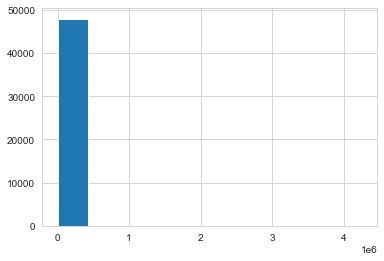

In [2099]:
df['LAND SQUARE FEET'].hist() #And way too many outliers

In [2100]:
ranges(df,"LAND SQUARE FEET")

LAND SQUARE FEET 
Min:  2.0 
Max:  4252327.0 
Mean:  4790.159078590786 
Median:  2500.0 
Mode:  0    2000.0
dtype: float64


### Making a new coloumn "LAND SQUARE FEET 2" to get rid of nulls

In [2101]:
df['LAND SQUARE FEET 2'] = df['LAND SQUARE FEET'].interpolate(method ='linear', limit_direction ='backward')

In [2102]:
infocol(df,"LAND SQUARE FEET 2")

LAND SQUARE FEET 2 
Null Values: 0 
No. of uniques: 35988 
Unique key: False 
Type: float64


<AxesSubplot:>

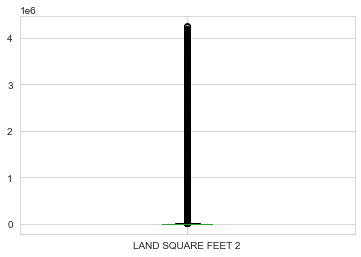

In [2103]:
df.boxplot(column='LAND SQUARE FEET 2', sym='o', return_type='axes')
#Our data still has many outliers

<AxesSubplot:>

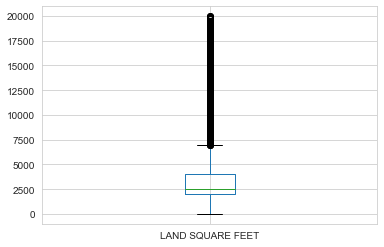

In [2104]:
subset = df[df['LAND SQUARE FEET 2']<20000]
subset.boxplot(column='LAND SQUARE FEET', sym='o', return_type='axes')

<AxesSubplot:title={'center':'LAND SQUARE FEET 2'}, xlabel='BOROUGH'>

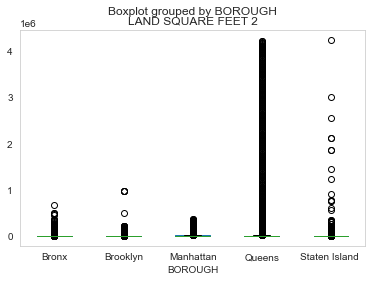

In [2105]:
df.boxplot(by ='BOROUGH', column =['LAND SQUARE FEET 2'] , grid = False) 
# way too many outliers in QUEENS and STATEN ISLAND

# 14.2 GROSS SQUARE FEET (Filling nulls with values)

In [2106]:
infocol(df,"GROSS SQUARE FEET") #way too many nulls

GROSS SQUARE FEET 
Null Values: 33967 
No. of uniques: 5690 
Unique key: False 
Type: float64


<AxesSubplot:>

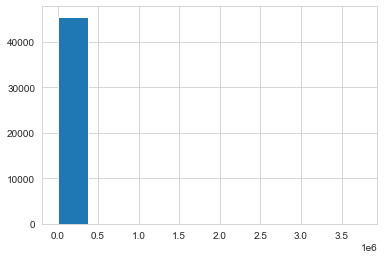

In [2107]:
df['GROSS SQUARE FEET'].hist() #And way too many outliers

In [2108]:
ranges(df,"GROSS SQUARE FEET")

GROSS SQUARE FEET 
Min:  60.0 
Max:  3750565.0 
Mean:  5060.445110832839 
Median:  2000.0 
Mode:  0    2400.0
dtype: float64


### Making a new coloumn "GROSS SQUARE FEET 2" to get rid of nulls

In [2109]:
df['GROSS SQUARE FEET 2'] = df['GROSS SQUARE FEET'].interpolate(method ='linear', limit_direction ='backward')

In [2110]:
infocol(df,"LAND SQUARE FEET 2")

LAND SQUARE FEET 2 
Null Values: 0 
No. of uniques: 35988 
Unique key: False 
Type: float64


<AxesSubplot:>

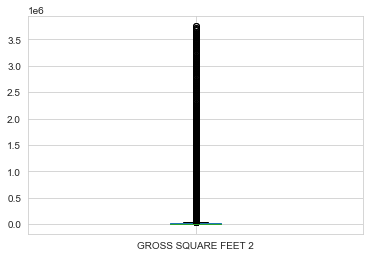

In [2111]:
df.boxplot(column='GROSS SQUARE FEET 2', sym='o', return_type='axes')
#Our data still has many outliers

<AxesSubplot:>

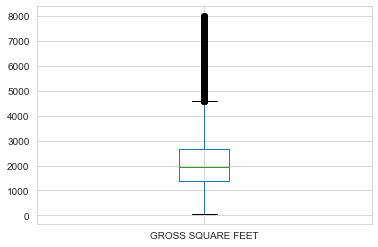

In [2112]:
subset = df[df['GROSS SQUARE FEET 2']<8000]
subset.boxplot(column='GROSS SQUARE FEET', sym='o', return_type='axes')

<AxesSubplot:title={'center':'GROSS SQUARE FEET 2'}, xlabel='BOROUGH'>

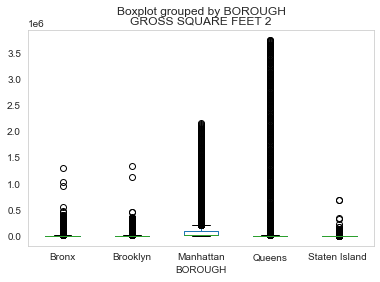

In [2113]:
df.boxplot(by ='BOROUGH', column =['GROSS SQUARE FEET 2'] , grid = False) 
# way too many outliers in QUEENS and MANHATTAN

# 15.2 YEAR BUILT

In [2114]:
infocol(df,"YEAR BUILT")

YEAR BUILT 
Null Values: 6055 
No. of uniques: 158 
Unique key: False 
Type: datetime64[ns]


In [2115]:
df['YEAR BUILT'].isnull().sum()

6055

In [2116]:
df['YEAR BUILT'].mode()

0   1970-01-01 00:00:00.000001920
dtype: datetime64[ns]

In [2117]:
df['YEAR BUILT'].replace(np.nan,1970-1-1 , inplace=True) 

# 16.2 TAX CLASS AT TIME OF SALE (Filling nulls with values)

In [2118]:
df["TAX CLASS AT TIME OF SALE"].isnull().sum() #Has no nulls

0

# 17.2 BUILDING CLASS AT TIME OF SALE (Filling nulls with values)

In [2119]:
df["BUILDING CLASS AT TIME OF SALE"].isnull().sum() #Has no nulls

0

# 18.2 SALE PRICE (Filling nulls with values)

In [2120]:
df["SALE PRICE"].isnull().sum() #Has Many nulls

9499

<AxesSubplot:title={'center':'SALE PRICE'}, xlabel='BOROUGH'>

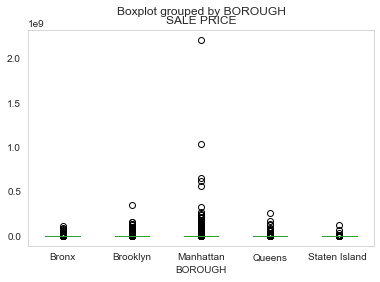

In [2121]:
df.boxplot(by ='BOROUGH', column =['SALE PRICE'] , grid = False) 
#Outliers most in Manhattan

In [2122]:
ranges(df,'SALE PRICE')

SALE PRICE 
Min:  0.0 
Max:  2210000000.0 
Mean:  1276456.4977638705 
Median:  530000.0 
Mode:  0    0.0
dtype: float64


### Making a new coloumn "SALE PRICE 2" to get rid of nulls

In [2123]:
df['SALE PRICE 2'] = df['SALE PRICE'].interpolate(method ='linear', limit_direction ='backward')

In [2124]:
df["SALE PRICE 2"].isnull().sum() #Has Many nulls

0

# 19.2 SALE DATE (Filling nulls with values)

In [2125]:
df['SALE DATE'].isnull().sum()

2

In [2126]:
df['SALE DATE'].mode()

0   2017-06-29
dtype: datetime64[ns]

In [2127]:
df['SALE DATE'].replace(np.nan,2017-6-29 , inplace=True) 

In [2129]:
df['SALE DATE'].isnull().sum()

0

In [2130]:
df.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  31516
GROSS SQUARE FEET                 33967
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                         9499
SALE DATE                             0
SALE_ID                               0
LAND SQUARE FEET 2                    0
GROSS SQUARE FEET 2                   0
SALE PRICE 2                          0
dtype: int64

In [1]:
def heatmap(x, y, size, color):
    fig, ax = plt.subplots()
    
    # Mapping from column names to integer coordinates
    x_labels = [v for v in sorted(x.unique())]
    y_labels = [v for v in sorted(y.unique())]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
    
    size_scale = 500
    
    n_colors = 256 # Use 256 colors for the diverging color palette
    palette = sns.diverging_palette(20, 220, n=n_colors) # Create the palette
    color_min, color_max = [-1, 1] # Range of values that will be mapped to the palette, i.e. min and max possible correlation

    def value_to_color(val):
        val_position = float((val - color_min)) / (color_max - color_min) # position of value in the input range, relative to the length of the input range
        ind = int(val_position * (n_colors - 1)) # target index in the color palette
        return palette[ind]
    
    plot_grid = plt.GridSpec(1, 15, hspace=0.2, wspace=0.1) # Setup a 1x15 grid
    ax = plt.subplot(plot_grid[:,:-1]) # Use the leftmost 14 columns of the grid for the main plot
    
    ax.scatter(
        x=x.map(x_to_num), # Use mapping for x
        y=y.map(y_to_num), # Use mapping for y
        s=size * size_scale, # Vector of square sizes, proportional to size parameter
        c=color.apply(value_to_color), # Vector of square colors, mapped to color palette
        marker='s' # Use square as scatterplot marker
    )
    
    # Show column labels on the axes
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels)
    
    ax.grid(False, 'major') # Turn off major gridlines
    ax.grid(True, 'minor') # Turn on minor gridlines
    ax.set_xticks([t + 0.5 for t in ax.get_xticks()], minor=True) # Set gridlines to appear between integer coordinates
    ax.set_yticks([t + 0.5 for t in ax.get_yticks()], minor=True) # Do the same for y axis
    
    ax.set_xlim([-0.5, max([v for v in x_to_num.values()]) + 0.5]) 
    ax.set_ylim([-0.5, max([v for v in y_to_num.values()]) + 0.5])
       
    # Add color legend on the right side of the plot
    ax = plt.subplot(plot_grid[:,-1]) # Use the rightmost column of the plot

    col_x = [0]*len(palette) # Fixed x coordinate for the bars
    y=np.linspace(color_min, color_max, n_colors) # y coordinates for each of the n_colors bars

    bar_height = y[1] - y[0]
    ax.barh(
        y=y,
        width=[5]*len(palette), # Make bars 5 units wide
        left=col_x, # Make bars start at 0
        height=bar_height,
        color=palette,
        linewidth=0
    )
    ax.set_xlim(1, 2) # Bars are going from 0 to 5, so lets crop the plot somewhere in the middle
    ax.grid(False) # Hide grid
    ax.set_facecolor('white') # Make background white
    ax.set_xticks([]) # Remove horizontal ticks
    ax.set_yticks(np.linspace(min(y), max(y), 3)) # Show vertical ticks for min, middle and max
    ax.yaxis.tick_right() # Show vertical ticks on the right 
    
columns = ['TOTAL UNITS', 'LAND SQUARE FEET 2', 'GROSS SQUARE FEET 2', 'SALE PRICE 2'] 
corr = df[columns].corr()
corr = pd.melt(corr.reset_index(), id_vars='index') # Unpivot the dataframe, so we can get pair of arrays for x and y
corr.columns = ['x', 'y', 'value']
heatmap(
    x=corr['x'],
    y=corr['y'],
    size=corr['value'].abs(),
    color=corr['value']
)

NameError: name 'df' is not defined

# Questions we can answer:
###  1. No. of building sold is maximum in Queens and minimum in Bronx (for ref. see 1.1 BOROUGH)
###  2. One family homes are the most bought category of property (for ref. see 3.1 BUILDING CLASS CATEGORY)
###  3. Most buildings are chrged with class 1 tax class (for ref. 4.1 TAX CLASS AT PRESENT)
###  4. Case of Missing Not at Random, there are 4147 such rows which have NULLS in three coloummns, which are:
##### 1.LAND SQ FEET
##### 2.GROSS SQ FEET
##### 3.SALE PRICE 
### 5. Case of Missing Not at Random, there are 915 such rows which have nulls in a four coloumns, which are:
##### 1. YEAR BUILT
##### 2. LAND SQ FEET
##### 3. GROSS SQ FEET
##### 4. SALE PRICE
### 6. Outliers:
##### 1. Outliers of sales most in Manhattan (for ref. see 18.2)
##### 2. Outliers of Gross sq feet most in Queens and Manhattan (for ref. see 14.2)
##### 3.Outliers of Land Sq feet most in Queens and Staten Island (for ref. see 13.2)
### Correlation:
##### Sale price has a week positive relation with No. of units and Gross square feet.

In [2132]:
df.to_csv(r'D:\cleaned.csv')